<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variance-inflation-factor-(VIF)" data-toc-modified-id="Variance-inflation-factor-(VIF)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variance inflation factor (VIF)</a></span></li></ul></div>

In [917]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import distplot, boxplot, despine
from seaborn import countplot, axes_style
from seaborn import lmplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import show,figure
from matplotlib.pyplot import subplot
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [918]:
data = pd.read_csv('kc_house_data.csv')
display(data)

data.info()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [919]:
# Checking the range of ur data which shows that it is from May 2014 to May 2015
data['date'] = pd.to_datetime(data['date'])
print(data['date'].min(), data['date'].max())

data.head()
np.round(data.describe())

2014-05-02 00:00:00 2015-05-27 00:00:00


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [920]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [921]:
correlation = data.corr()

correlation


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


<Figure size 1080x864 with 0 Axes>

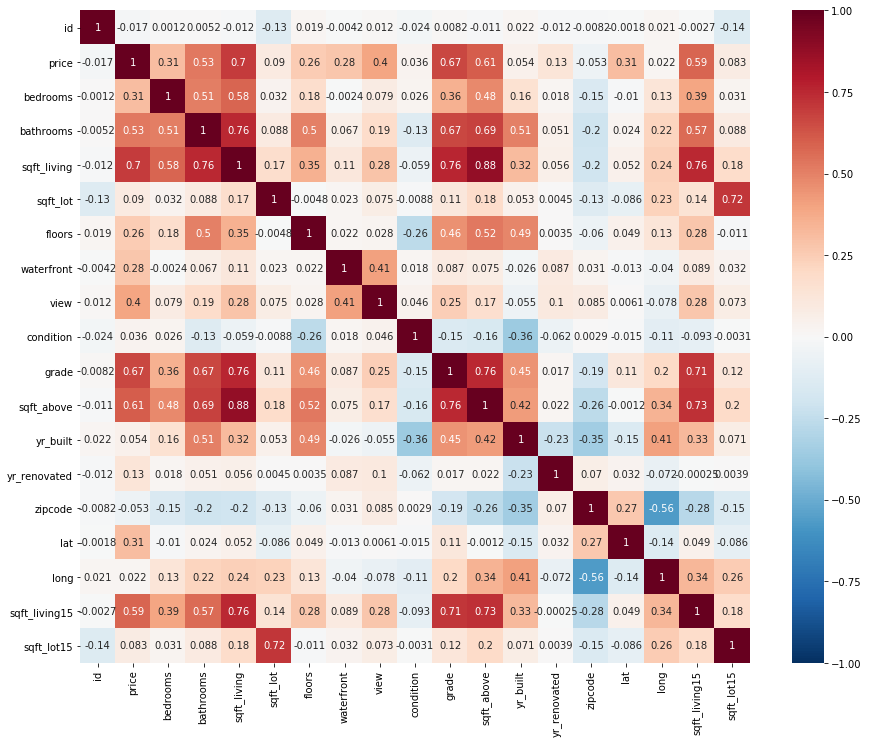

In [922]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


In [923]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

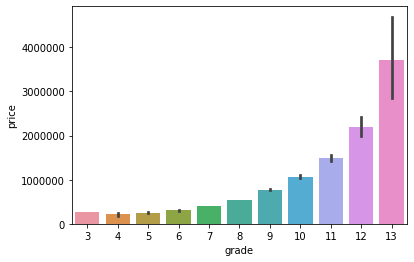

In [924]:
sns.barplot(x=data['grade'], y=data['price']);

In [925]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


<Figure size 864x576 with 0 Axes>

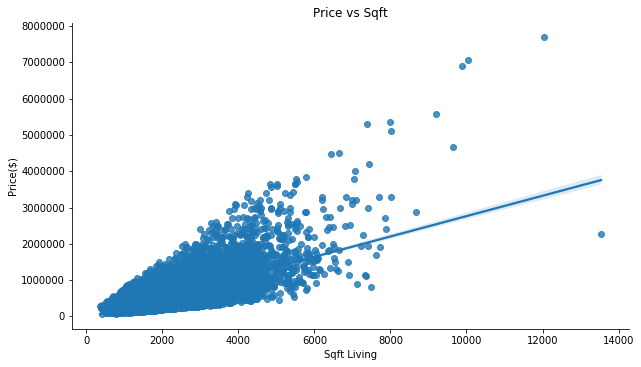

In [926]:
plt.figure(figsize = (12,8));
g=sns.lmplot(x="sqft_living", y="price",aspect=1.8,data=data)
plt.title("Price vs Sqft")
g.set_xlabels("Sqft Living")
g.set_ylabels("Price($)")
plt.show();

In [927]:
data_price=data[(data['price'] > 200000) & (data['price'] <= 1000000)]
data_price
len(data_price)
price_perc=(len(data_price)/len(data)) * 100
print(price_perc)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


19301

89.36889382784646


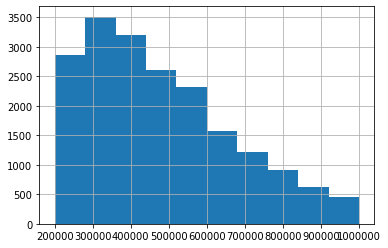

In [928]:
data_price['price'].hist()

In [929]:

data_price.info()
data_price['condition'].unique()
data_price['bedrooms'].unique()
data_price['sqft_above'].unique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19301 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19301 non-null  int64         
 1   date           19301 non-null  datetime64[ns]
 2   price          19301 non-null  float64       
 3   bedrooms       19301 non-null  int64         
 4   bathrooms      19301 non-null  float64       
 5   sqft_living    19301 non-null  int64         
 6   sqft_lot       19301 non-null  int64         
 7   floors         19301 non-null  float64       
 8   waterfront     17163 non-null  float64       
 9   view           19246 non-null  float64       
 10  condition      19301 non-null  int64         
 11  grade          19301 non-null  int64         
 12  sqft_above     19301 non-null  int64         
 13  sqft_basement  19301 non-null  object        
 14  yr_built       19301 non-null  int64         
 15  yr_renovated   1587

array([3, 5, 4, 1, 2])

array([ 3,  4,  2,  5,  1,  6,  7,  8,  9, 11, 10, 33])

array([1180, 2170, 1050, 1680, 1715, 1060, 1890, 1860,  860, 1430, 1370,
       1810, 1980, 1600, 1250, 2270, 1070, 2450, 1710, 1750, 1400,  790,
       2570, 2320, 1190, 1510, 1090, 1280,  930, 2360,  890, 2620, 2600,
       3595, 1570,  920, 3160,  990, 2290, 1640, 1000, 2130, 2830, 2250,
       2420, 3250, 1850, 1590, 1260, 2519, 1540, 1110, 1770, 2720, 2240,
       2380, 2390,  880, 1040,  910, 3450, 2350, 1900, 1010,  960, 2660,
       1610,  765, 1290, 1960, 1210, 1270, 1440, 2190, 1460, 1170, 3140,
       2030, 2310,  700, 1160, 1080, 2520, 2780, 1560, 1450,  770, 1720,
       2910, 1620, 1360, 2070, 2460, 1390, 2140, 1340, 1550,  940, 1380,
       3670, 2370, 1130,  980, 2500, 1760, 1030, 1780, 3400, 2680, 1670,
       2590,  820, 1320, 1220, 2440, 1100, 1330, 1420, 1690, 2150, 1910,
       1350, 1940,  900, 1630, 2714,  850, 2760, 2330, 2020, 1120, 1480,
       1230, 2280, 3530,  830, 1300, 2740, 2010, 1240, 3360,  800, 1730,
       1200,  760, 1700,  580, 2653, 2850, 2210, 35

In [930]:
#Considering data for bedrooms less than 6
data_price=data_price[(data_price['bedrooms'] < 6)]
data_price



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


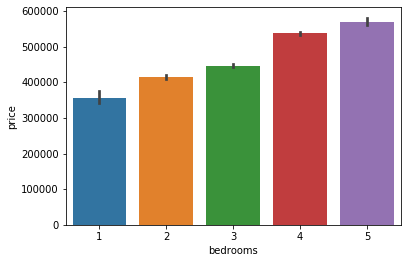

In [931]:
sns.barplot(x=data_price['bedrooms'], y=data_price['price']);


In [932]:
#Considering data for bathrooms less than 5
data_price=data_price[(data_price['bathrooms'] < 5)]
data_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


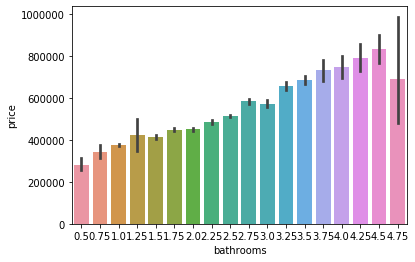

In [933]:
sns.barplot(x=data_price['bathrooms'], y=data_price['price']);

In [934]:
data_price['zipcode'].unique()
data_price['zipcode'].value_counts()


array([98178, 98125, 98136, 98074, 98003, 98198, 98146, 98038, 98007,
       98115, 98028, 98107, 98126, 98019, 98103, 98133, 98092, 98030,
       98002, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056,
       98166, 98053, 98023, 98148, 98105, 98042, 98008, 98059, 98122,
       98144, 98004, 98034, 98075, 98116, 98010, 98118, 98040, 98032,
       98045, 98102, 98077, 98108, 98177, 98065, 98029, 98006, 98109,
       98022, 98033, 98155, 98024, 98168, 98011, 98031, 98106, 98070,
       98199, 98072, 98188, 98005, 98014, 98055, 98039])

98103    571
98038    569
98052    544
98115    542
98117    525
        ... 
98109     81
98102     78
98024     71
98148     49
98039      6
Name: zipcode, Length: 70, dtype: int64

In [935]:
data_price['view'].unique()


array([ 0., nan,  3.,  4.,  2.,  1.])

In [936]:
data_price.fillna(0, inplace=True)


In [937]:
data_price['waterfront'].unique()
data_price['bathrooms'].unique()

array([0., 1.])

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  , 3.5 ,
       0.75, 4.25, 1.25, 4.5 , 3.75, 4.75, 0.5 ])

In [938]:
data_price['waterfront'].unique()
data_price['bathrooms'].unique()


array([0., 1.])

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  , 3.5 ,
       0.75, 4.25, 1.25, 4.5 , 3.75, 4.75, 0.5 ])

In [939]:
data_price['view'].unique()
data_price['sqft_basement'].value_counts()


array([0., 3., 4., 2., 1.])

0.0       11484
?           391
600.0       201
500.0       197
700.0       186
          ...  
172.0         1
2040.0        1
915.0         1
1730.0        1
906.0         1
Name: sqft_basement, Length: 258, dtype: int64

In [940]:
data_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19035 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19035 non-null  int64         
 1   date           19035 non-null  datetime64[ns]
 2   price          19035 non-null  float64       
 3   bedrooms       19035 non-null  int64         
 4   bathrooms      19035 non-null  float64       
 5   sqft_living    19035 non-null  int64         
 6   sqft_lot       19035 non-null  int64         
 7   floors         19035 non-null  float64       
 8   waterfront     19035 non-null  float64       
 9   view           19035 non-null  float64       
 10  condition      19035 non-null  int64         
 11  grade          19035 non-null  int64         
 12  sqft_above     19035 non-null  int64         
 13  sqft_basement  19035 non-null  object        
 14  yr_built       19035 non-null  int64         
 15  yr_renovated   1903

In [941]:
# Replacing the '?' in our data frame
data_price = data_price.replace(to_replace='?', value = 0)
data_price['sqft_basement'].value_counts()


0.0       11484
0           391
600.0       201
500.0       197
700.0       186
          ...  
176.0         1
652.0         1
2196.0        1
792.0         1
1740.0        1
Name: sqft_basement, Length: 258, dtype: int64

In [942]:
data_price['sqft_basement'] = data_price.sqft_basement.astype('float')
data_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19035 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19035 non-null  int64         
 1   date           19035 non-null  datetime64[ns]
 2   price          19035 non-null  float64       
 3   bedrooms       19035 non-null  int64         
 4   bathrooms      19035 non-null  float64       
 5   sqft_living    19035 non-null  int64         
 6   sqft_lot       19035 non-null  int64         
 7   floors         19035 non-null  float64       
 8   waterfront     19035 non-null  float64       
 9   view           19035 non-null  float64       
 10  condition      19035 non-null  int64         
 11  grade          19035 non-null  int64         
 12  sqft_above     19035 non-null  int64         
 13  sqft_basement  19035 non-null  float64       
 14  yr_built       19035 non-null  int64         
 15  yr_renovated   1903

In [943]:
data_price['sqft_basement'].value_counts()
data_price['yr_renovated'].value_counts()


0.0       11875
600.0       201
500.0       197
700.0       186
800.0       175
          ...  
1913.0        1
2200.0        1
2110.0        1
1890.0        1
143.0         1
Name: sqft_basement, Length: 257, dtype: int64

0.0       18471
2014.0       62
2013.0       26
2000.0       25
2007.0       22
          ...  
1956.0        1
1957.0        1
1959.0        1
1951.0        1
1974.0        1
Name: yr_renovated, Length: 69, dtype: int64

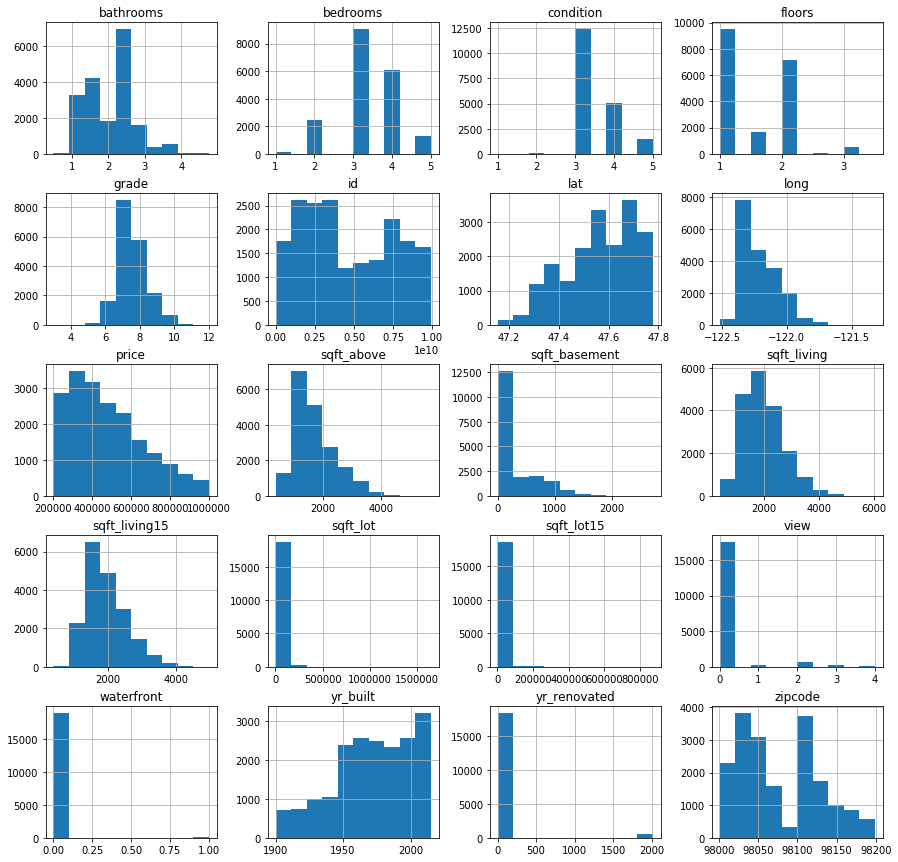

In [944]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data_price.hist(ax = ax);

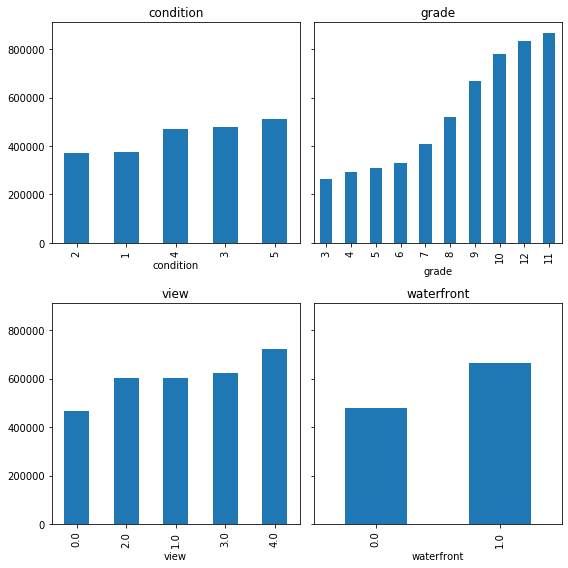

In [945]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharey=True)
categoricals = ['condition', 'grade', 'view', 'waterfront']
for col, ax in zip(categoricals, axes.flatten()):
    (data_price.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    ax.set_title(col)                # Make the title the name of the column
fig.tight_layout();

In [946]:
#Dropping unwanted columns
data_price = data_price.drop('date',axis=1)
data_price = data_price.drop('id', axis=1)
data_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819


In [947]:
# Creating a dictionary to save results of the models being used.
def store_results_to_dict(model_name, model_desc, r2, r2_adj,cv_10_res_mean,cv_10_res_std):
    curr_dict = {'Model Name':model_name
                 ,'Model Description':model_desc
                 ,'R2 train value':r2
                 ,'R2 test value':test_r_squared
                 ,'CV Res Mean':cv_10_res_mean
                 ,'CV Res Std':cv_10_res_std
                }
    return curr_dict
# Want to keep a track of all results
results = []

In [948]:
#Importing additional libraries
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm


In [949]:
#mode zero
outcome = 'price'
predictors = data_price.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
modelzero = ols(formula=formula, data=data_price).fit()
modelzero.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     2135.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:59:46   Log-Likelihood:            -2.4782e+05
No. Observations:               19035   AIC:                         4.957e+05
Df Residuals:                   19016   BIC:                         4.958e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.405e+06   1.73e+06     -3.700      0.000    -9.8e+06   -3.01e+06
bedrooms      -1.067e+04   1265.855     -8.428      0.000   -1.31e+04   -8187.289
bathrooms      2.351e+04   1988.785     11.821      0.000    1.96e+04    2.74e+04
sqft_living      62.4592     11.566      5.400      0.000      39.789      85.129
sqft_lot          0.2564      0.029      8.878      0.000       0.200       0.313
floors         3.179e+04   2125.325     14.957      0.000    2.76e+04     3.6e+04
waterfront     1.344e+05   1.63e+04      8.222      0.000    1.02e+05    1.66e+05
view           2.734e+04   1387.274     19.706      0.000    2.46e+04    3.01e+04
condition      2.255e+04   1383.121     16.303      0.000    1.98e+04    2.53e+04
grade          6.981e+04   1307.918     53.375      0.000    6.72e+04    7.24e+04
sqft_above        5.8975     11.546      0.511      0.610     -16.734      28.529
sqft_basement     3.3709     11.462      0.294      0.769     -19.095      25.837
yr_built      -1857.2150     43.143    -43.048      0.000   -1941.779   -1772.651
yr_renovated     11.7938      2.460      4.795      0.000       6.972      16.615
zipcode        -187.0905     19.551     -9.569      0.000    -225.413    -148.768
lat            5.236e+05   6135.559     85.338      0.000    5.12e+05    5.36e+05
long          -2.533e+04   7640.565     -3.316      0.001   -4.03e+04   -1.04e+04
sqft_living15    46.3369      2.196     21.104      0.000      42.033      50.641
sqft_lot15       -0.1581      0.044     -3.624      0.000      -0.244      -0.073
==============================================================================
Omnibus:                     1132.617   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1728.222
Skew:                           0.505   Prob(JB):                         0.00
Kurtosis:                       4.076   Cond. No.                     2.20e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [950]:
###sikitlearn regression with same features of model zero
X_train, X_test, y_train, y_test = train_test_split(predictors, data_price['price'], test_size=0.25)
linreg = LinearRegression()
X = X_train
y = y_train
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))
cross_val_score(linreg, predictors, data_price['price'], scoring='neg_mean_squared_error')
cv_10_res_mean = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_10_res_std = np.std(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print(cv_10_res_mean,cv_10_res_std,train_r_squared,test_r_squared)
linreg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([-1.22295834e+10, -1.23294594e+10, -1.15311188e+10, -1.17336262e+10,
       -1.23885021e+10])

Train RMSE score is : 108706.04293348233
Test RMSE score is : 110315.52807062624
-11854403139.144058 551356868.4491183 0.6687268286433519 0.6694430491856033


array([-9.43597464e+03,  2.25837530e+04,  6.08291198e+01,  2.38783163e-01,
        3.29094469e+04,  1.23654113e+05,  2.87458031e+04,  2.27698890e+04,
        7.05597578e+04,  6.98433951e+00,  4.63465844e+00, -1.84612465e+03,
        1.00007742e+01, -1.84736729e+02,  5.23528241e+05, -2.72888034e+04,
        4.49780721e+01, -1.33561724e-01])

In [951]:

results.append(store_results_to_dict('modelzero','All preliminary variables included'
                                     ,train_r_squared, test_r_squared
                                     ,cv_10_res_mean,cv_10_res_std))

results


[{'Model Name': 'modelzero',
  'Model Description': 'All preliminary variables included',
  'R2 train value': 0.6687268286433519,
  'R2 test value': 0.6694430491856033,
  'CV Res Mean': -11854403139.144058,
  'CV Res Std': 551356868.4491183}]

In [952]:
#Scaling Data
scaled_bed = (data_price.bedrooms - data_price.bedrooms.mean()) / data_price.bedrooms.std()
scaled_bath = (data_price.bathrooms - data_price.bathrooms.mean()) / data_price.bathrooms.std()
scaled_floors = (data_price.floors - data_price.floors.mean()) /data_price.floors.std()
scaled_built = (data_price.yr_built - data_price.yr_built.mean()) / data_price.yr_built.std()
scaled_lat = (data_price.lat - data_price.lat.mean()) / data_price.lat.std()
scaled_long = (data_price.long - data_price.long.mean()) / data_price.long.std()
scaled_sqft_living15 = (data_price.sqft_living15 - data_price.sqft_living15.mean()) / data_price.sqft_living15.std()
scaled_sqft_lot15 = (data_price.sqft_lot15 - data_price.sqft_lot15.mean()) / data_price.sqft_lot15.std()
scaled_grade =(data_price.grade - data_price.grade.mean()) / data_price.grade.std()
#logscaled_grade =np.log(data_price.grade)

In [953]:
# Feature Selection
# house latitude and longitude are unique values for the house and it will not help for predicting the  sale price
# so i will not include lat and long
# i will not include sqft_liv ,and sqft_above because of its multicolearity 
data_final = pd.DataFrame([])
data_final['bedrooms'] = scaled_bed
data_final['bathrooms'] = scaled_bath
data_final['floor'] = scaled_floors
data_final['built'] = scaled_built
#data_final['lat'] = scaled_lat 
#data_final['long'] = scaled_long
#data_final['sqft_liv'] = scaled_sqft_living15
data_final['sqft_lot15'] = scaled_sqft_lot15
#data_final['grade'] = logscaled_grade
data_final['grade'] = scaled_grade
condition_dummies = pd.get_dummies(data_price['condition'], prefix='cond', drop_first=True)
view_dummies = pd.get_dummies(data_price['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(data_price['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(data_price['zipcode'], prefix='zip', drop_first=True)
sale_price = data_price['price']
data_final = pd.concat([sale_price,data_final,zipcode_dummies,condition_dummies,view_dummies,waterfront_dummies], axis=1)
data_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19035 entries, 0 to 21596
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       19035 non-null  float64
 1   bedrooms    19035 non-null  float64
 2   bathrooms   19035 non-null  float64
 3   floor       19035 non-null  float64
 4   built       19035 non-null  float64
 5   sqft_lot15  19035 non-null  float64
 6   grade       19035 non-null  float64
 7   zip_98002   19035 non-null  uint8  
 8   zip_98003   19035 non-null  uint8  
 9   zip_98004   19035 non-null  uint8  
 10  zip_98005   19035 non-null  uint8  
 11  zip_98006   19035 non-null  uint8  
 12  zip_98007   19035 non-null  uint8  
 13  zip_98008   19035 non-null  uint8  
 14  zip_98010   19035 non-null  uint8  
 15  zip_98011   19035 non-null  uint8  
 16  zip_98014   19035 non-null  uint8  
 17  zip_98019   19035 non-null  uint8  
 18  zip_98022   19035 non-null  uint8  
 19  zip_98023   19035 non-nul

In [954]:
#Renaming columns with zero issue in the name
data_final=data_final.rename({'view_1.0':'view_1','view_2.0':'view_2','view_3.0':'view_3','view_4.0':'view_4','water_1.0':'water_1'}, axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19035 entries, 0 to 21596
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       19035 non-null  float64
 1   bedrooms    19035 non-null  float64
 2   bathrooms   19035 non-null  float64
 3   floor       19035 non-null  float64
 4   built       19035 non-null  float64
 5   sqft_lot15  19035 non-null  float64
 6   grade       19035 non-null  float64
 7   zip_98002   19035 non-null  uint8  
 8   zip_98003   19035 non-null  uint8  
 9   zip_98004   19035 non-null  uint8  
 10  zip_98005   19035 non-null  uint8  
 11  zip_98006   19035 non-null  uint8  
 12  zip_98007   19035 non-null  uint8  
 13  zip_98008   19035 non-null  uint8  
 14  zip_98010   19035 non-null  uint8  
 15  zip_98011   19035 non-null  uint8  
 16  zip_98014   19035 non-null  uint8  
 17  zip_98019   19035 non-null  uint8  
 18  zip_98022   19035 non-null  uint8  
 19  zip_98023   19035 non-nul

In [955]:
#Model Prediction 1
outcome1 = 'price'
predictors_1 = data_final.drop('price', axis=1)
pred_sum_1 = '+'.join(predictors_1.columns)
formula = outcome1 + '~' + pred_sum_1
model1 = ols(formula=formula, data=data_final).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     725.5
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:59:47   Log-Likelihood:            -2.4464e+05
No. Observations:               19035   AIC:                         4.895e+05
Df Residuals:                   18950   BIC:                         4.901e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.812e+05   2.26e+04     12.450      0.000    2.37e+05    3.26e+05
bedrooms    1.843e+04    808.562     22.791      0.000    1.68e+04       2e+04
bathrooms   3.404e+04   1031.085     33.010      0.000     3.2e+04    3.61e+04
floor       2217.0296    926.971      2.392      0.017     400.084    4033.975
built      -3.674e+04   1112.826    -33.016      0.000   -3.89e+04   -3.46e+04
sqft_lot15   1.44e+04    761.864     18.903      0.000    1.29e+04    1.59e+04
grade        8.49e+04    960.269     88.411      0.000     8.3e+04    8.68e+04
zip_98002  -6136.3209   9554.984     -0.642      0.521   -2.49e+04    1.26e+04
zip_98003  -1.608e+04   7993.760     -2.011      0.044   -3.17e+04    -407.305
zip_98004   4.732e+05   9626.043     49.153      0.000    4.54e+05    4.92e+05
zip_98005   3.198e+05   9490.950     33.697      0.000    3.01e+05    3.38e+05
zip_98006   2.599e+05   7267.619     35.764      0.000    2.46e+05    2.74e+05
zip_98007   2.244e+05   9904.156     22.661      0.000    2.05e+05    2.44e+05
zip_98008    2.14e+05   7926.226     27.002      0.000    1.98e+05     2.3e+05
zip_98010   1.111e+05    1.1e+04     10.090      0.000    8.95e+04    1.33e+05
zip_98011   1.493e+05   8597.127     17.365      0.000    1.32e+05    1.66e+05
zip_98014   1.287e+05   1.06e+04     12.106      0.000    1.08e+05     1.5e+05
zip_98019   1.106e+05   8712.505     12.697      0.000    9.35e+04    1.28e+05
zip_98022  -5425.9374   8504.974     -0.638      0.523   -2.21e+04    1.12e+04
zip_98023  -3.638e+04   7005.099     -5.193      0.000   -5.01e+04   -2.26e+04
zip_98024     1.5e+05   1.24e+04     12.147      0.000    1.26e+05    1.74e+05
zip_98027   1.912e+05   7198.915     26.556      0.000    1.77e+05    2.05e+05
zip_98028   1.309e+05   7755.904     16.882      0.000    1.16e+05    1.46e+05
zip_98029    2.07e+05   7575.990     27.328      0.000    1.92e+05    2.22e+05
zip_98030   2210.0756   8083.660      0.273      0.785   -1.36e+04    1.81e+04
zip_98031   1414.8184   7835.942      0.181      0.857   -1.39e+04    1.68e+04
zip_98032  -2.475e+04   1.06e+04     -2.335      0.020   -4.55e+04   -3970.506
zip_98033   3.001e+05   7392.985     40.595      0.000    2.86e+05    3.15e+05
zip_98034   1.664e+05   6760.321     24.617      0.000    1.53e+05     1.8e+05
zip_98038   5.168e+04   6646.248      7.776      0.000    3.87e+04    6.47e+04
zip_98039   6.168e+05   3.82e+04     16.151      0.000    5.42e+05    6.92e+05
zip_98040   3.995e+05   9526.839     41.938      0.000    3.81e+05    4.18e+05
zip_98042   1.349e+04   6806.905      1.982      0.047     151.013    2.68e+04
zip_98045   1.084e+05   8367.126     12.957      0.000     9.2e+04    1.25e+05
zip_98052   2.533e+05   6709.437     37.749      0.000     2.4e+05    2.66e+05
zip_98053    2.74e+05   7264.985     37.718      0.000     2.6e+05    2.88e+05
zi

In [956]:
### sickit learn model
X_train, X_test, y_train, y_test = train_test_split(predictors_1, data_final['price'], test_size=0.25)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))
cross_val_score(linreg, predictors, data_price['price'], scoring='neg_mean_squared_error')
cv_10_res_mean = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_10_res_std = np.std(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print(cv_10_res_mean,cv_10_res_std,train_r_squared,test_r_squared)
linreg.coef_


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([-1.22295834e+10, -1.23294594e+10, -1.15311188e+10, -1.17336262e+10,
       -1.23885021e+10])

Train RMSE score is : 92797.87275239005
Test RMSE score is : 91323.2841676204
-11854403139.144058 551356868.4491183 0.7622015129285842 0.7629990941181222


array([ 1.87140011e+04,  3.38710368e+04,  2.52655324e+03, -3.82683314e+04,
        1.32827777e+04,  8.52091658e+04, -4.62108737e+03, -2.21857483e+04,
        4.71260397e+05,  3.14664590e+05,  2.60754445e+05,  2.17893728e+05,
        2.12806851e+05,  1.15289577e+05,  1.39146813e+05,  1.30648585e+05,
        1.10551467e+05, -6.19239428e+03, -4.06210977e+04,  1.57019489e+05,
        1.92139488e+05,  1.23316667e+05,  2.08477822e+05, -2.84341529e+02,
        2.86356230e+02, -2.88239409e+04,  2.95116159e+05,  1.63392606e+05,
        4.93922227e+04,  6.13424229e+05,  4.04759828e+05,  1.00630271e+04,
        1.13287606e+05,  2.52594021e+05,  2.76008935e+05,  3.62044194e+04,
        1.03969332e+05,  3.13118257e+04,  1.19132943e+05,  1.71727866e+05,
        1.08371004e+05,  1.74895286e+05,  2.20824452e+05,  2.61326187e+05,
        1.95666706e+05, -1.46898057e+04,  3.05132924e+05,  2.38732104e+05,
        2.94381814e+05,  7.44581092e+04,  2.38442734e+05,  7.80219288e+04,
        3.17305879e+05,  

In [957]:
results.append(store_results_to_dict('Model1','Feature Selection'
                                     ,train_r_squared, test_r_squared
                                     ,cv_10_res_mean,cv_10_res_std))

results

[{'Model Name': 'modelzero',
  'Model Description': 'All preliminary variables included',
  'R2 train value': 0.6687268286433519,
  'R2 test value': 0.6694430491856033,
  'CV Res Mean': -11854403139.144058,
  'CV Res Std': 551356868.4491183},
 {'Model Name': 'Model1',
  'Model Description': 'Feature Selection',
  'R2 train value': 0.7622015129285842,
  'R2 test value': 0.7629990941181222,
  'CV Res Mean': -11854403139.144058,
  'CV Res Std': 551356868.4491183}]

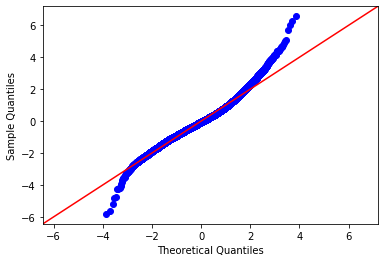

In [958]:

#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)

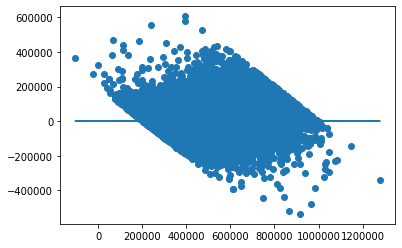

In [959]:
# Checking for Homoscedasticity
plt.scatter(model1.predict(predictors_1), model1.resid)
plt.plot(model1.predict(predictors_1), [0 for i in range(len(predictors_1))]);


In [960]:
#Dropping columns based on p value
data_final.drop(['zip_98002','zip_98003','zip_98014','zip_98019','zip_98022','zip_98030','zip_98042','zip_98045','zip_98055','zip_98058','zip_98148','zip_98168','zip_98178','zip_98188','zip_98198','cond_2','cond_3'], axis=1,inplace=True)
data_final.head()

,price,bedrooms,bathrooms,floor,built,sqft_lot15,grade,zip_98004,zip_98005,zip_98006,...,zip_98166,zip_98177,zip_98199,cond_4,cond_5,view_1,view_2,view_3,view_4,water_1
0,221900.0,-0.380962,-1.566673,-0.901189,-0.567147,-0.256058,-0.561629,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,-0.380962,0.279524,0.951510,-0.704164,-0.181541,-0.561629,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.857149,1.387242,-0.901189,-0.224604,-0.280410,-0.561629,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,-0.380962,-0.089715,-0.901189,0.528989,-0.186636,0.448635,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,-0.380962,0.279524,0.951510,0.803023,-0.212262,-0.561629,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [961]:
# model number 2
outcome2 = 'price'
predictors_2 = data_final.drop('price', axis=1)
pred_sum_2 = '+'.join(predictors_2.columns)
formula = outcome2 + '~' + pred_sum_2
model2 = ols(formula=formula, data=data_final).fit()
model2.summary()
## using sikitlearn regression for reporting more stastics
X_train, X_test, y_train, y_test = train_test_split(predictors_1, data_final['price'], test_size=0.25)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))
cross_val_score(linreg, predictors, data_price['price'], scoring='neg_mean_squared_error')
cv_10_res_mean = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_10_res_std = np.std(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print(cv_10_res_mean,cv_10_res_std,train_r_squared,test_r_squared)
linreg.coef_


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     874.4
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:59:48   Log-Likelihood:            -2.4494e+05
No. Observations:               19035   AIC:                         4.900e+05
Df Residuals:                   18967   BIC:                         4.905e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.433e+05   1746.718    196.529      0.000     3.4e+05    3.47e+05
bedrooms    1.791e+04    819.226     21.867      0.000    1.63e+04    1.95e+04
bathrooms   3.417e+04   1045.734     32.679      0.000    3.21e+04    3.62e+04
floor       2809.0870    938.996      2.992      0.003     968.571    4649.603
built      -3.682e+04   1116.766    -32.971      0.000    -3.9e+04   -3.46e+04
sqft_lot15  1.687e+04    743.485     22.695      0.000    1.54e+04    1.83e+04
grade       8.476e+04    969.272     87.442      0.000    8.29e+04    8.67e+04
zip_98004   4.462e+05   8248.520     54.098      0.000     4.3e+05    4.62e+05
zip_98005   2.927e+05   8089.002     36.183      0.000    2.77e+05    3.09e+05
zip_98006   2.331e+05   5205.143     44.791      0.000    2.23e+05    2.43e+05
zip_98007   1.978e+05   8589.685     23.026      0.000    1.81e+05    2.15e+05
zip_98008   1.878e+05   6112.309     30.717      0.000    1.76e+05       2e+05
zip_98010   7.992e+04   9861.973      8.104      0.000    6.06e+04    9.92e+04
zip_98011   1.212e+05   6994.673     17.321      0.000    1.07e+05    1.35e+05
zip_98023  -6.373e+04   4831.110    -13.192      0.000   -7.32e+04   -5.43e+04
zip_98024   1.167e+05   1.14e+04     10.273      0.000    9.44e+04    1.39e+05
zip_98027   1.616e+05   5101.579     31.686      0.000    1.52e+05    1.72e+05
zip_98028   1.033e+05   5890.738     17.528      0.000    9.17e+04    1.15e+05
zip_98029   1.787e+05   5661.937     31.557      0.000    1.68e+05     1.9e+05
zip_98031  -2.584e+04   6007.302     -4.301      0.000   -3.76e+04   -1.41e+04
zip_98032  -5.146e+04   9407.878     -5.470      0.000   -6.99e+04    -3.3e+04
zip_98033   2.729e+05   5383.611     50.688      0.000    2.62e+05    2.83e+05
zip_98034   1.391e+05   4451.163     31.240      0.000     1.3e+05    1.48e+05
zip_98038   2.235e+04   4282.241      5.219      0.000     1.4e+04    3.07e+04
zip_98039   5.908e+05   3.84e+04     15.383      0.000    5.16e+05    6.66e+05
zip_98040   3.732e+05   8130.139     45.908      0.000    3.57e+05    3.89e+05
zip_98052   2.255e+05   4382.988     51.450      0.000    2.17e+05    2.34e+05
zip_98053   2.439e+05   5204.183     46.865      0.000    2.34e+05    2.54e+05
zip_98056   7.835e+04   5113.704     15.321      0.000    6.83e+04    8.84e+04
zip_98059   9.055e+04   4804.584     18.847      0.000    8.11e+04       1e+05
zip_98065   1.443e+05   5732.317     25.174      0.000    1.33e+05    1.56e+05
zip_98070   6.547e+04   9445.596      6.931      0.000     4.7e+04     8.4e+04
zip_98072   1.552e+05   6086.408     25.494      0.000    1.43e+05    1.67e+05
zip_98074   1.936e+05   4998.635     38.738      0.000    1.84e+05    2.03e+05
zip_98075   2.372e+05   5658.415     41.923      0.000    2.26e+05    2.48e+05
zip_98077   1.681e+05   7273.609     23.114      0.000    1.54e+05    1.82e+05
zi

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([-1.22295834e+10, -1.23294594e+10, -1.15311188e+10, -1.17336262e+10,
       -1.23885021e+10])

Train RMSE score is : 92256.94757784542
Test RMSE score is : 93054.9602075719
-11854403139.144058 551356868.4491183 0.7624941238899814 0.7615949954742333


array([ 18203.38034837,  33625.05968607,   1887.47615944, -37074.91030604,
        13547.31948257,  86199.37162128,  -3073.70584535, -13827.75029587,
       458467.53013022, 314231.76342493, 261132.05835944, 225407.29863221,
       212931.46193523, 107593.83846333, 151836.76610643, 123226.37143211,
       112780.86768715,  -3829.62057421, -34141.23163523, 145692.09097509,
       189417.02778501, 131213.52623505, 207737.1569499 ,   6075.33092209,
         4431.91227059, -25563.28446841, 298856.63287078, 167231.08866484,
        54850.26416967, 637774.49987317, 400375.14530434,  14241.06651613,
       110973.08379365, 257983.45734432, 280435.98545582,  40263.69621222,
       108768.16330803,  34842.33950928, 118278.06563177, 173270.51484026,
       107672.70975656, 181176.98659638, 225133.67613239, 269186.17045949,
       195767.99821465,  -8691.70741243, 309290.44686224, 247459.79619982,
       304960.20014257,  78292.48114623, 241820.58201814,  81299.6071719 ,
       318510.13513388, 3

In [962]:
# appending model2 results to my dataframe of results
results.append(store_results_to_dict('Model2','After dropping p-values more than 0.05'
                                     ,model2.rsquared, model2.rsquared_adj
                                     ,cv_10_res_mean,cv_10_res_std))

results

[{'Model Name': 'modelzero',
  'Model Description': 'All preliminary variables included',
  'R2 train value': 0.6687268286433519,
  'R2 test value': 0.6694430491856033,
  'CV Res Mean': -11854403139.144058,
  'CV Res Std': 551356868.4491183},
 {'Model Name': 'Model1',
  'Model Description': 'Feature Selection',
  'R2 train value': 0.7622015129285842,
  'R2 test value': 0.7629990941181222,
  'CV Res Mean': -11854403139.144058,
  'CV Res Std': 551356868.4491183},
 {'Model Name': 'Model2',
  'Model Description': 'After dropping p-values more than 0.05',
  'R2 train value': 0.7554192509768543,
  'R2 test value': 0.7615949954742333,
  'CV Res Mean': -11854403139.144058,
  'CV Res Std': 551356868.4491183}]

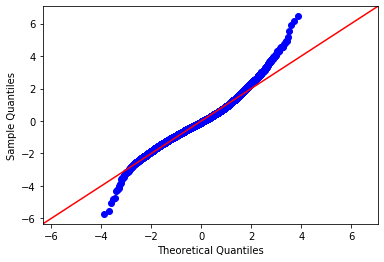

In [963]:
# checking the qqplot after model2, gives better normality
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

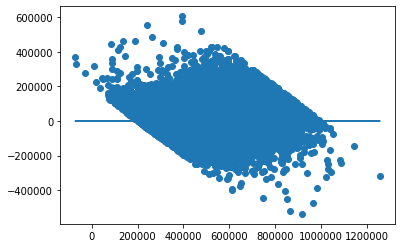

In [964]:
# Checking again for Homoscedasticity
plt.scatter(model2.predict(predictors_1), model2.resid)
plt.plot(model2.predict(predictors_1), [0 for i in range(len(predictors_1))]);

 ### Variance inflation factor (VIF)
To Check for Multicollinearity between 3 variables and more, I've run VIF test If my features have a vif of 5 or greater, this means they are displaying multicollinearity with other variables in the feature set. I we'll check the VIF:

In [965]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#X = predictors_3.columns
X = predictors_2
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(predictors_1, vif))

[('bedrooms', 1.4398228743240107),
 ('bathrooms', 2.3538949142242003),
 ('floor', 1.8952930372732342),
 ('built', 2.466482063670968),
 ('sqft_lot15', 1.1823850152404776),
 ('grade', 1.984462786546599),
 ('zip_98002', 1.0126762203427428),
 ('zip_98003', 1.0245979468916857),
 ('zip_98004', 1.0627578889149025),
 ('zip_98005', 1.0148511070505688),
 ('zip_98006', 1.031592486274099),
 ('zip_98007', 1.0179040506349433),
 ('zip_98008', 1.0067145891425233),
 ('zip_98010', 1.0318568880728924),
 ('zip_98011', 1.0215504481847753),
 ('zip_98014', 1.036962704058323),
 ('zip_98019', 1.0105442242413767),
 ('zip_98022', 1.0325295183783376),
 ('zip_98023', 1.0238702100545571),
 ('zip_98024', 1.0105114326478895),
 ('zip_98027', 1.0250049346662056),
 ('zip_98028', 1.0264755039935503),
 ('zip_98029', 1.0538291299493217),
 ('zip_98030', 1.0014942877463855),
 ('zip_98031', 1.0299565327304405),
 ('zip_98032', 1.0419239346157538),
 ('zip_98033', 1.0366418745068546),
 ('zip_98034', 1.0393009139433602),
 ('zip_9

 No columns has VIF > 5, all features will be kept

In [966]:
# sumarize the model results as dataframe
df_model_results = pd.DataFrame(results)
df_model_results.head(20)


,Model Name,Model Description,R2 train value,R2 test value,CV Res Mean,CV Res Std
0,modelzero,All preliminary variables included,0.668727,0.669443,-1.185440e+10,5.513569e+08
1,Model1,Feature Selection,0.762202,0.762999,-1.185440e+10,5.513569e+08
2,Model2,After dropping p-values more than 0.05,0.755419,0.761595,-1.185440e+10,5.513569e+08
